# Imports and functions 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pathlib import Path

In [70]:
base_path = Path("/home/maxime/synrepos/phenoseeker/tmp/")
#base_path = Path("/projects/synsight/repos/phenoseeker/tmp/")

In [85]:
path_poscon_openphenom = Path("./openphenom/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_openphenom = Path("./openphenom/48_plates_2_combi/results/maps_plate.csv")
path_poscon_dinov2_g = Path("./dinov2_g/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_dinov2_g = Path("./dinov2_g/48_plates_2_combi/results/maps_plate.csv")
path_poscon_dinov2_s = Path("./dinov2_s/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_dinov2_s = Path("./dinov2_s/48_plates_2_combi/results/maps_plate.csv")
path_poscon_resnet50_mean = Path("./resnet50_mean/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_resnet50_mean = Path("./resnet50_mean/48_plates_2_combi/results/maps_plate.csv")
path_poscon_resnet50_median = Path("./resnet50_median/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_resnet50_median = Path("./resnet50_median/48_plates_2_combi/results/maps_plate.csv")
path_poscon_chada = Path("./chada/48_plates_2_combi/results/maps_jcp2022.csv")
path_plates_chada = Path("./chada/48_plates_2_combi/results/maps_plate.csv")

In [87]:
def preprocess(path):
    df_raw = pd.read_csv(base_path / path)
    df_raw.columns = [col.replace('mAP', '').replace('raw_', '').replace('(', '').replace(')', '').replace('raw', 'Raw').strip() for col in df_raw.columns]
    df = df_raw.drop(columns=['Number of Queries'])
    df = df.set_index('Label').drop(index='Mean mAP').astype(float)
    return df.mean()


In [92]:
def plot_curve_comparison(encoders_dict):
    """
    Plot mAP values for multiple encoders with custom styling.
    Highlights specific points for each encoder (No Normalisation, Best Normalisation) with unified colors.

    Args:
        encoders_dict: Dictionary where keys are encoder names and values are lists containing:
                       [poscon_values, batch_effect_values, best_normalisation_index].
    """
    plt.figure(figsize=(14, 8))

    # Define marker styles for each encoder
    marker_styles = ['o', 's', 'D', '^', 'v', 'P', 'X']  # Extend as needed
    unified_no_norm_color = '#D55E00'  # Unified color for "No Normalisation"
    unified_best_norm_color = '#009E73'  # Unified color for "Best Normalisation"
    unified_random_color = '#F0E442'  # Unified color for "Random Values"

    shape_patches = []  # For shape legend

    for i, (encoder, values) in enumerate(encoders_dict.items()):
        mean_values_1, mean_values_2, best_normalisation_index = values

        # Assign unique marker
        marker = marker_styles[i % len(marker_styles)]

        # General scatter plot with lighter points
        plt.scatter(mean_values_2, mean_values_1, 
                    color="grey", alpha=1, s=20, marker=marker)

        # Highlight the first point (No Normalisation)
        plt.scatter(mean_values_2['Embeddings_Raw'], mean_values_1['Embeddings_Raw'], 
                    color=unified_no_norm_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)
        # Highlight the best normalisation point
        plt.scatter(mean_values_2["Embeddings Random"], mean_values_1["Embeddings Random"], 
                    color=unified_random_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)
        # Highlight the best normalisation point
        plt.scatter(mean_values_2[best_normalisation_index], mean_values_1[best_normalisation_index], 
                    color=unified_best_norm_color, alpha=1.0, s=100, edgecolor='black', linewidth=1, 
                    marker=marker)

        # Add to shape legend if not already added
        if marker not in [line.get_marker() for line in shape_patches]:
            shape_patches.append(mlines.Line2D([], [], color='black', marker=marker, linestyle='None', markersize=10, label=f'{encoder}'))


    # Add labels
    plt.xlabel('mAP - Positive Control Molecules Retrieval', fontsize=14, labelpad=10)
    plt.ylabel('mAP - Plates Retrieval', fontsize=14, labelpad=10)

    # Refine grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.legend(handles=shape_patches, loc='upper left', bbox_to_anchor=(1.05, 0.5), fontsize=12)

    # Tight layout for better use of space and high resolution
    plt.tight_layout()
    plt.show()


# Plot

In [88]:
paths = {
    "poscon_openphenom": path_poscon_openphenom,
    "plates_openphenom": path_plates_openphenom,
    "poscon_dinov2_g": path_poscon_dinov2_g,
    "plates_dinov2_g": path_plates_dinov2_g,
    "poscon_dinov2_s": path_poscon_dinov2_s,
    "plates_dinov2_s": path_plates_dinov2_s,
    "poscon_resnet50_mean": path_poscon_resnet50_mean,
    "plates_resnet50_mean": path_plates_resnet50_mean,
    "poscon_resnet50_median": path_poscon_resnet50_median,
    "plates_resnet50_median": path_plates_resnet50_median,
    "poscon_chada": path_poscon_chada,
    "plates_chada":path_plates_chada,
}



# Valeurs d'"Embeddings Random" associées
embeddings_random_values = {
    "poscon_dinov2_g": 0.125,
    "plates_dinov2_g": 0.02,
    "poscon_dinov2_s": 0.125,
    "plates_dinov2_s": 0.02,
    "poscon_resnet50_mean": 0.125,
    "plates_resnet50_mean": 0.02,
    "poscon_resnet50_median": 0.125,
    "plates_resnet50_median": 0.02,
    "poscon_chada": 0.125,
    "plates_chada": 0.02,
    "poscon_openphenom": 0.125,
    "plates_openphenom": 0.02,
}

# Traitement automatisé
processed_data = {}

for key, path in paths.items():
    df = preprocess(path)
    if key in embeddings_random_values:
        df['Embeddings Random'] = embeddings_random_values[key]
    processed_data[key] = df



In [103]:
encoder = "chada"

df = pd.concat([processed_data[f'plates_{encoder}'], processed_data[f'poscon_{encoder}']], axis=1)
df.columns = ['Batch_effect', 'Poscon']
df.sort_values(by="Poscon",ascending=False).head(15)

,Batch_effect,Poscon
Embeddings_Raw__ZCA_C__rZMi,0.323994,0.384089
Embeddings_Raw__ZCA_C__rZMs,0.296224,0.378187
Embeddings_Raw__ZCA-cor_C__rZMi,0.319663,0.376090
Embeddings_Raw__ZCA-cor_C__rZMs,0.290773,0.371285
Embeddings_Raw__ZCA_N_C__rZms,0.036569,0.371004
Embeddings_Raw__ZCA_N_C__rZMs,0.035204,0.370668
Embeddings_Raw__ZCA_N_C__rZmi,0.036548,0.369416
Embeddings_Raw__ZCA_N_C__rZMi,0.035265,0.369061
Embeddings_Raw__ZCA_N_C__Int,0.034644,0.366975
Embeddings_Raw__ZCA_C__rZmi,0.040322,0.362836


In [108]:
all_encoder = {
    'ChAda': [ processed_data["plates_chada"],processed_data["poscon_chada"], 'Embeddings_Raw__ZCA_N_C__rZms'],
    'Dinov2_g': [ processed_data["plates_dinov2_g"],processed_data["poscon_dinov2_g"],  'Embeddings_Raw__ZCA_C__Int'], 
    'Dinov2_s': [ processed_data["plates_dinov2_s"],processed_data["poscon_dinov2_s"], 'Embeddings_Raw__ZCA-cor_N_C__rZmi'], 
    'Open_Phenom': [ processed_data["plates_openphenom"],processed_data["poscon_openphenom"], 'Embeddings_Raw__rZMi'], 
    'Resnet50_mean': [ processed_data["plates_resnet50_mean"],processed_data["poscon_resnet50_mean"], 'Embeddings_Raw__ZCA-cor_C__rZMs'], 
    'Resnet50_median': [ processed_data["plates_resnet50_median"],processed_data["poscon_resnet50_median"], 'Embeddings_Raw__rZMs'], 
}

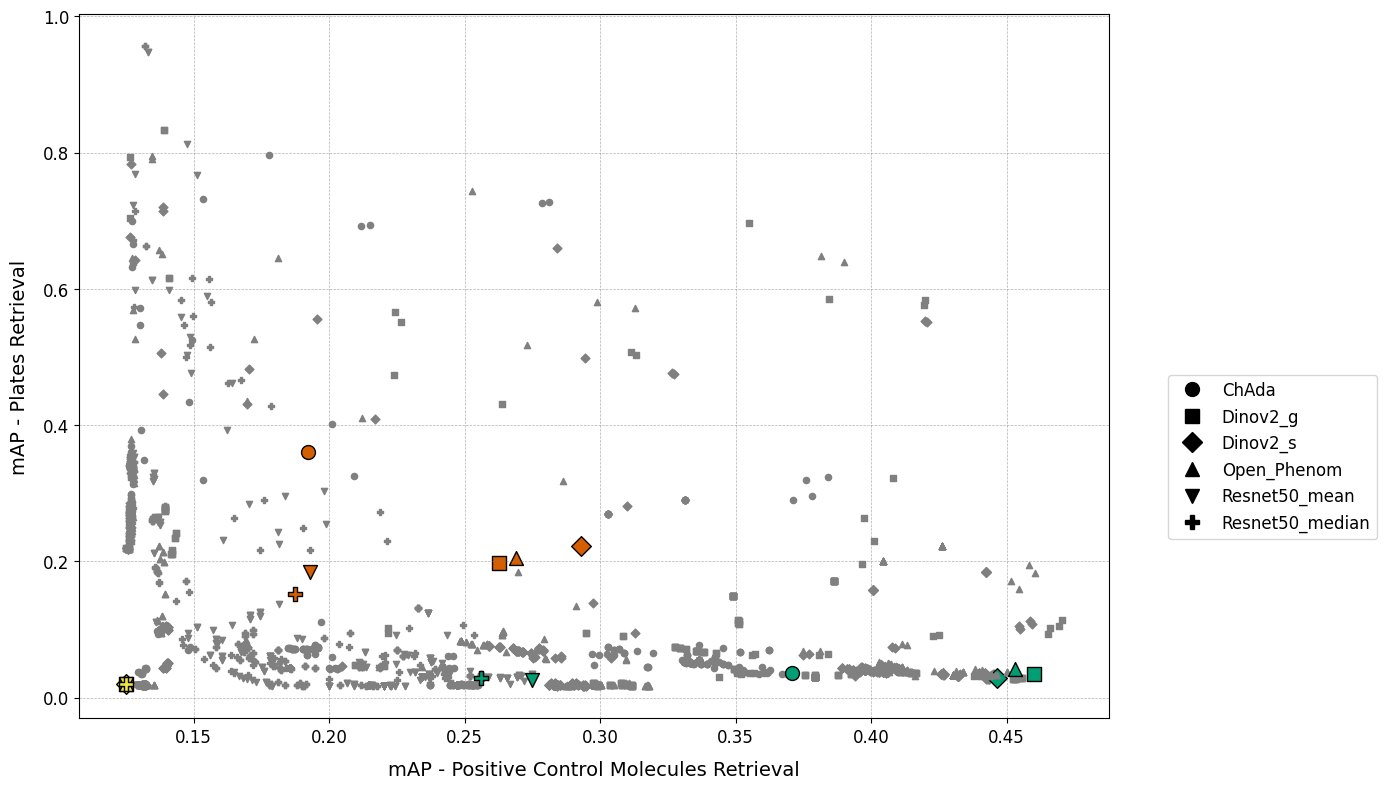

In [109]:
plot_curve_comparison(all_encoder)